# Final Report 

### Andrew Chaphiv
### DS5001

## Introduction 

This project explores a corpus of 9,798 abstracts collected from PubMed from the National Library of Medicine (NLM). Cancer has always been a fascinating area of research and the technologies that have developed over the past few years have allowed explosive progress in both diagnostic and therapeutic fields. I am most curious in how the treatment of cancer has evolved through analyzing the papers written on cancer treatment. Are we likely to see terms that have been constant throughout the time period? Have any terms died out through out the past decade? What treatments are being used now?

## Source Data

The NLM allows users to download the abstract and statistics of a paper through its website and has its own API [(1)], however, I developed a pipeline to extract the papers using code from github [(2)]. The data files in a box drive hosted by UVA [(3)]. The corpus is a compilation of 9,798 abstracts gathered from top articles/papers with the key word, "cancer treatment" from the years 1995, 2000, 2005, 2010, 2015, 2020, and 2023. Each abstract has an average of about 197 words and about 1424 characters. The source files were in a JSON and the authors, year, title, and abstracts were selected to create the data.

[(1)]: https://www.ncbi.nlm.nih.gov/books/NBK25501/
[(2)]: https://github.com/erilu/pubmed-abstract-compiler
[(3)]: https://virginia.box.com/s/n7d9m49jkdyz8zfewmh9thvrugr9v5wm

## Data Model 

Abstracts are usually a paragraph or shorter designed to given readers a succinct summary about the conclusions of a paper. 
The OHCO of the corpus can only be divided into the sentence to which each word belongs to. Before creating the csv files, the some of the data had to be removed because they were either in a different language or were not papers (NLM used to host a forum that allowed users to comment on papers). The abstracts were tokenized and annotated using modules from the NTLK library. 

| File Name | Description | Url |
| :- | -: | :-: |
| abstractsxxxx | A csv file containing the journal, title, authors, abstracts, DOI, and miscellanous information from the year xxxx | url 
| abstracts-CORPUS | Tokens table | url
| abstracts-LIB | Table containing title, authors, year, and abstract length for all the abstracts| url
| abstracts-VOCAB |  Tokens table complete with annotated linguistic features| url
| abstracts-BOW |  Tokens table containing frequency, tf, and tf-idf with abstract number as the index| url
| abstracts-COMPS|  Table of principal components generated during PCA| url
| abstracts-LOADINGS|  Table of loadings generated during PCA| url
| abstracts-DCM|  Document count matrix used during PCA| url
| abstracts-WORDEMBBED | Tokens table containing the vectors, t-SNE coordinates, and some annotated linguistic features| url
| abstracts-TOPICS |  Topics table generated during LDA topic modeling, complete with document weight sum, term frequency, and weight by each year| url
| abstracts-PHI| Phi table generated during LDA topic modeling| url
| abstracts-THETA |  Theta table generated during LDA topic modeling| url
| abstracts-SENTIMENTS|  Sentiments of tokens| url
| abstracts-YEARSENTIMENTS|  Sentiments by each year| url

<center><b>Table 1:</b> <i>Analytical files generated.</i> A table listing the files generated.</center>

## Exploration

### Principal Component Analysis 

Principal component analysis (PCA) was done to see whether or not the years of the papers could be separated in PCA space. The abstracts were converted into a bag of words with the abstract_num as the bag. A document-term matrix was created and the TFIDF was calculated. The top 991 nouns (singular and plural) from the TFIDF matrix was used to generate the principal components. The TFIDF matrix was normalized but not centered by the mean nor variance. 

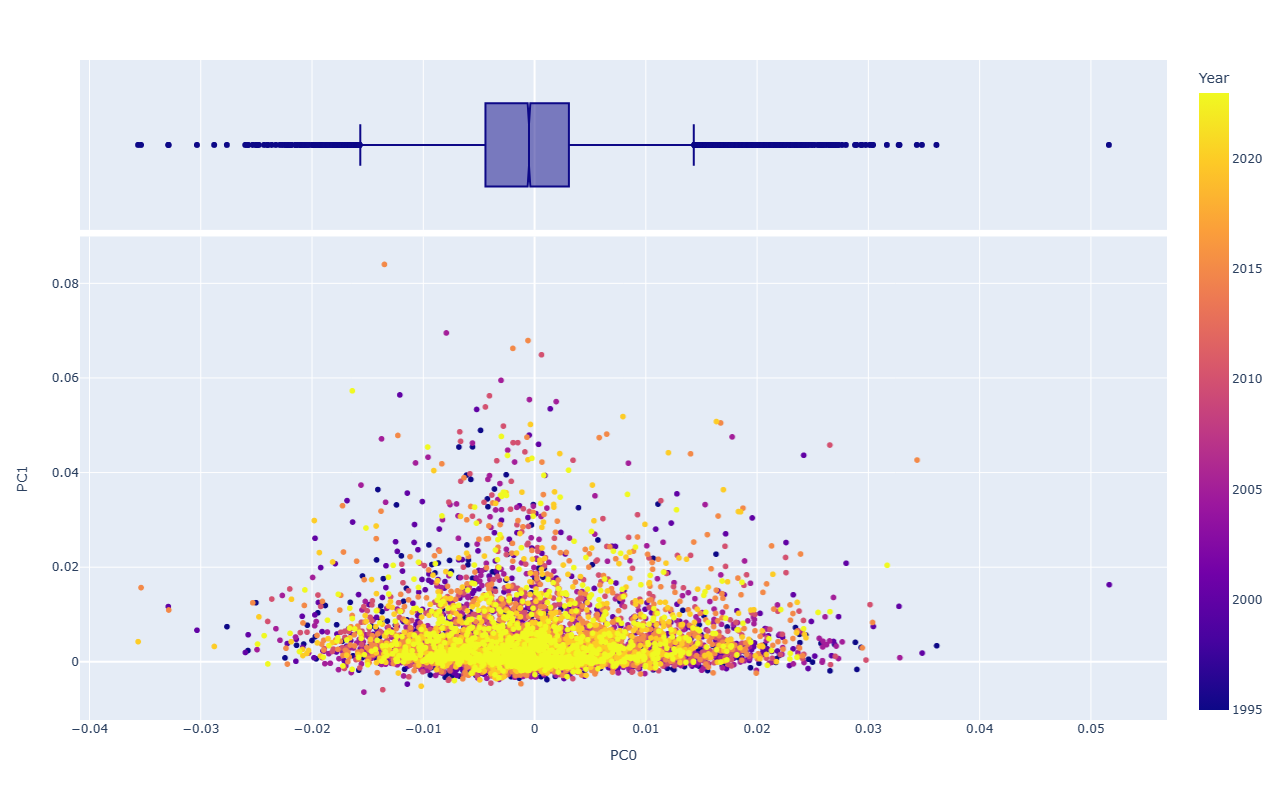

<center><b>Figure 1:</b> <i>DCM in PC0 and PC1.</i> Scatterplot of the PC0 and PC1 of the DCM matrix colored by year. </center>

In Fig. 1, we can see that most abstracts cluster around the origin, but the relative spread of each year is a bit different. In 2023 and 2020, the abstracts are strongly concentrated about the origin but are loaded on the positive side or negative side of PC0. Abstracts written before 2023 and 2020 are a bit more spread out but still located near abstracts 2023 and 2020. This suggests that more recent papers are probably much more similar to one another than compared to older papers. My interpretation is that researchers in the past basically explored a lot of different things, but built a lot of the knowledge that researchers today hone in on. PCA is not able to separate the documents on the basis of year, but it suggests that the documents are really similar if they are clustered together. What is interesting is that the things that are clustered near the origin are documents that are more clinical in nature (e.g. role of gene in cancer, effect of a drug on cancer, etc.) but some of the document that are really far from the origin falls under secondary research.

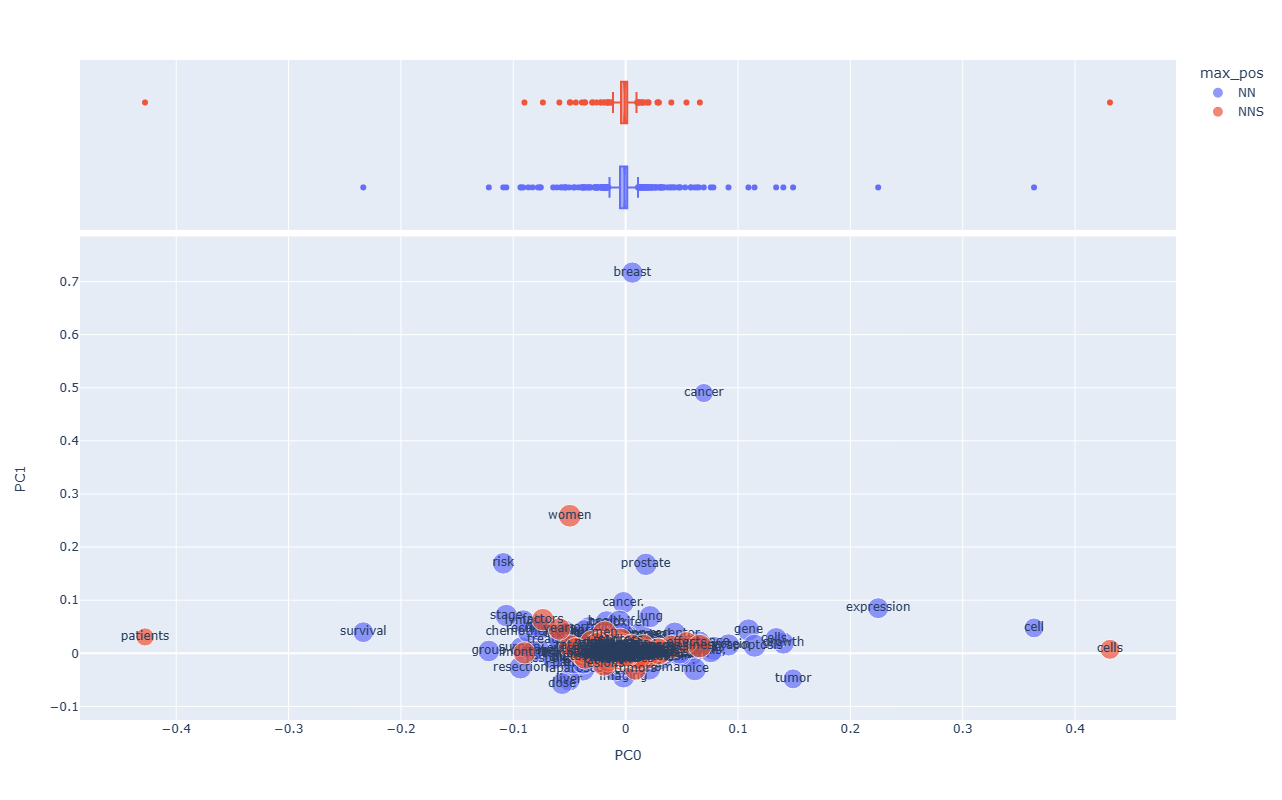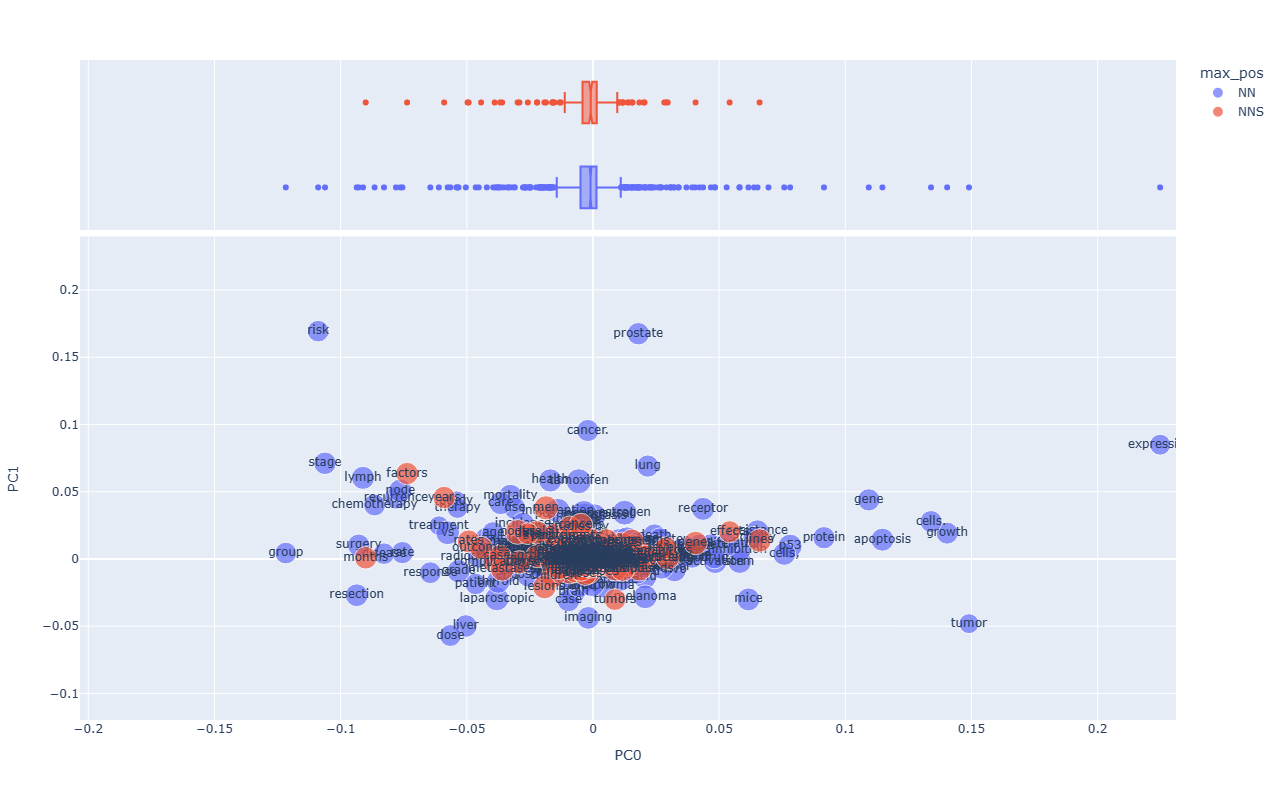

<center><b>Figure 2:</b> <i>Loadings in PC1 and PC2.</i> Scatterplot of the PC1 and PC2 of the Loading matrix colored by singular noun (NN) or plural noun (NNS). </center>

In Fig. 2, most of the terms are clustered near the origin and as you zoom into there is not really a pattern; everything that is related to cancer is close to one another, but what is pretty interesting is that cancer is kind of far from all those terms. I believe that this kind of reflects a trend; the shift of cancer from being an individual aliment but rather an umbrella term of similar aliments. Breast cancer is one of the most common cancers and it is quite far away from the center, which might suggest that a majority of the studies vary between one another. The terms that are furthest from the origin are terms that are likely most occuring in the corpus as these are terms one would likely see in a cancer study. There is quite a bit of words with punctuation which means that the tokenizer failed to properly tokenize everything. 

### Topic Modeling (LDA)

Topic models for the abstracts were generated using the following parameters: 4000 max features, 10 topics, 7 terms per topic, 5 maximum iterations, and an ngram range of 1 to 3. Only 10 topics were used as the addition of more topics seemed be extremely redundant.

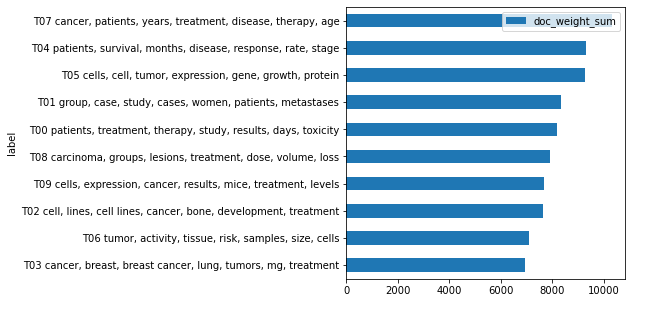 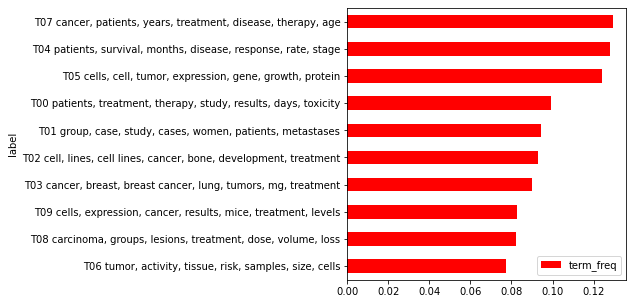

<center><b>Figure 3:</b> <i>Topics sorted in ascending order by different statistics.</i> Horizontal barplot of both document weight and term frequency of topics. </center>

Most of the topics are topics that are related to studies, the topic with the highest document weight and term frequency seems to be information about patients, particularly treatment and age. T4 seems to be more indepth information about the prognosis of cancer and T5 seems to be the molecular components related to cancer. The other topics seem to be a bit redundant but what is interesting is how women and mice are included in topics 1 and 9, respectively. As stated before, breast cancer is the most common in women annd the most common cancer, but women is not included in the topics that contain breast/breast cancer. It might be that in articles that do group or case studies, a majority of the subjects are women. Mice have contributed immensely to our understanding of cancer, so mice must have been included in a good portion of the corpus. 

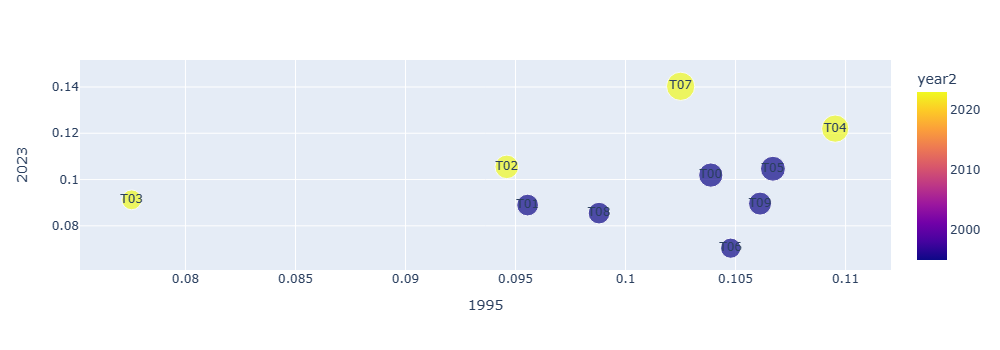

<center><b>Figure 4:</b> <i>Topics visualized by topic weight in the years 1995 and 2023.</i> Scatter plot of topic weight in the year 1995 against the year 2023 with topic colored according to the year that the topic is most associated with. </center>

The seperation of topics in Fig. 4 seem to emphasize a different approach to studying cancer. In the early stages of cancers, it involved mainly studying cancerous cells derived from one or a few patients, but with the introduction of new technology, studies were able to take a larger number of samples to derive patterns. The study of cancer shifted from a reductionist (emphasis on parts) to systems (emphasis on bigger picture). Although, that is not to say these approaches to studying cancer were gone or new, due to the fact that the topics are still have some magnitude in both 1995 and 2023. I believe that there is merits to both approaches and they still find their revelance in today and in the past.

### Word Embeddings (word2vec)

Gensim's word2vec model was used to generate word embeddings using the following parameters: window = 2, vector_size =  256, min_count = 50, workers = 4, perplexity = 20, and n_components = 2. Models were generated for each year and there is a model where all years are present. There were many nouns clustered together and it was hard to make meaningful clusters out of the word embeddings in the model with all the years. What I found in the models with the individual years is the separation of the different kinds of cancer treatments. Up until about the 2010s, chemotherapy and radiotherapy were standard practice until the introduction of immunotherapy. Chemotherapy and radiotherapy were effective but really damaging to patients because it targeted tumorous and healthy cells, immunotherapy is a type of targeted therapy in which the chances for targeting healthy cells is lower. Semantic algebra was used to determine an analogous term to immunotherapy, using the pair chemotherapy and radiotherapy. The most analogous term to immunotherapy is vaccines which is an interesting because I did not expect the model to capture that. Immunotherapy utilizes the immune system to combat cancer and so do vaccines. 

<b> (a) <b>

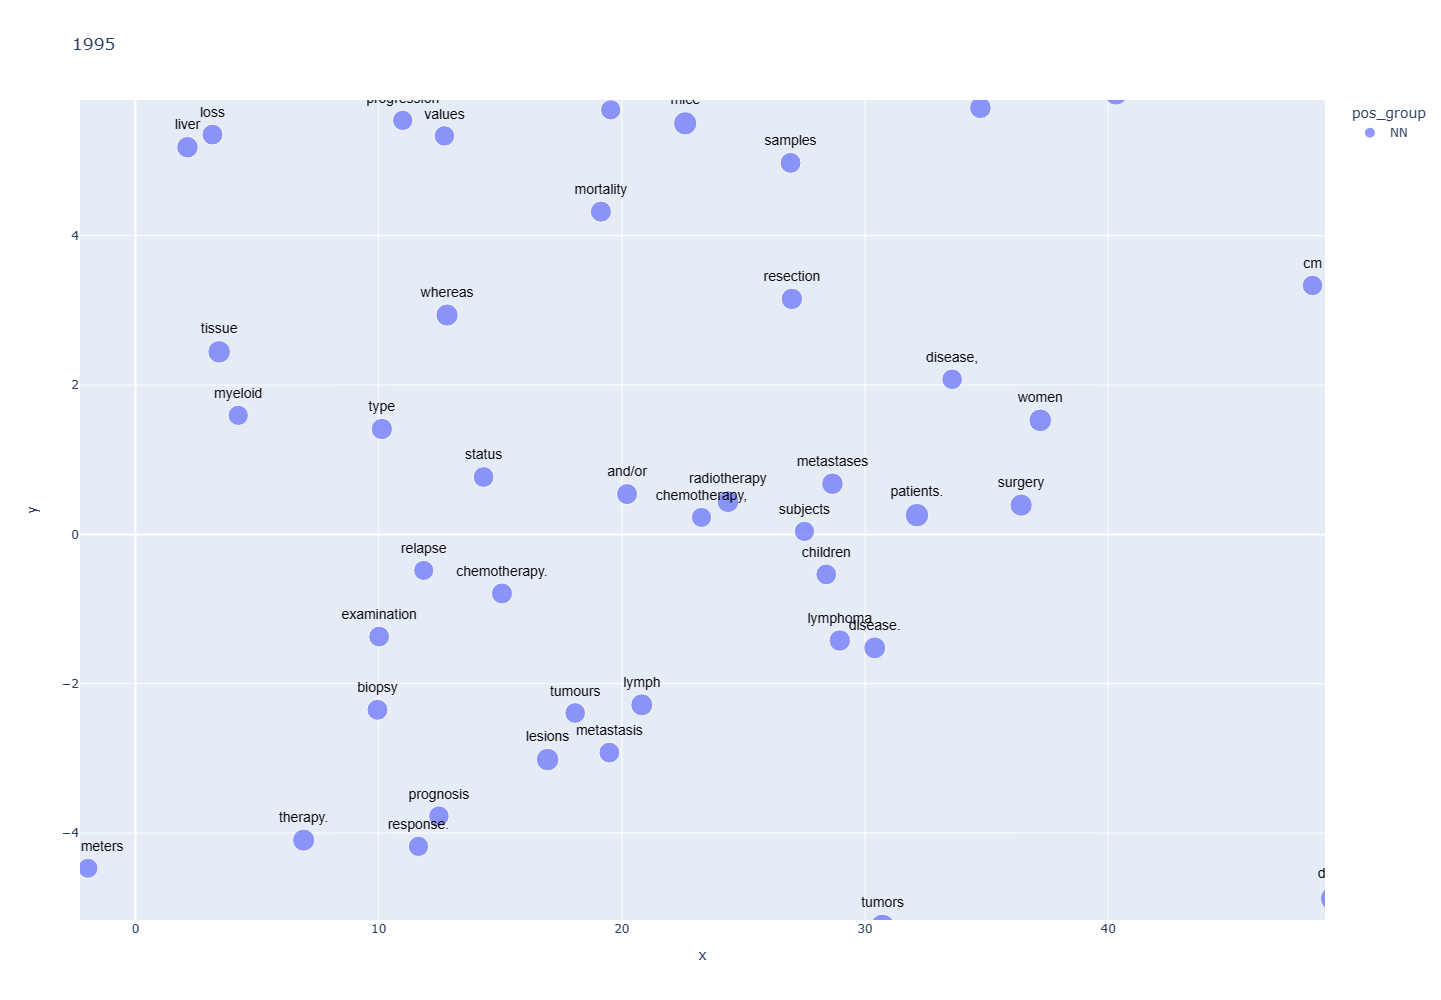

<b> (b) <b>

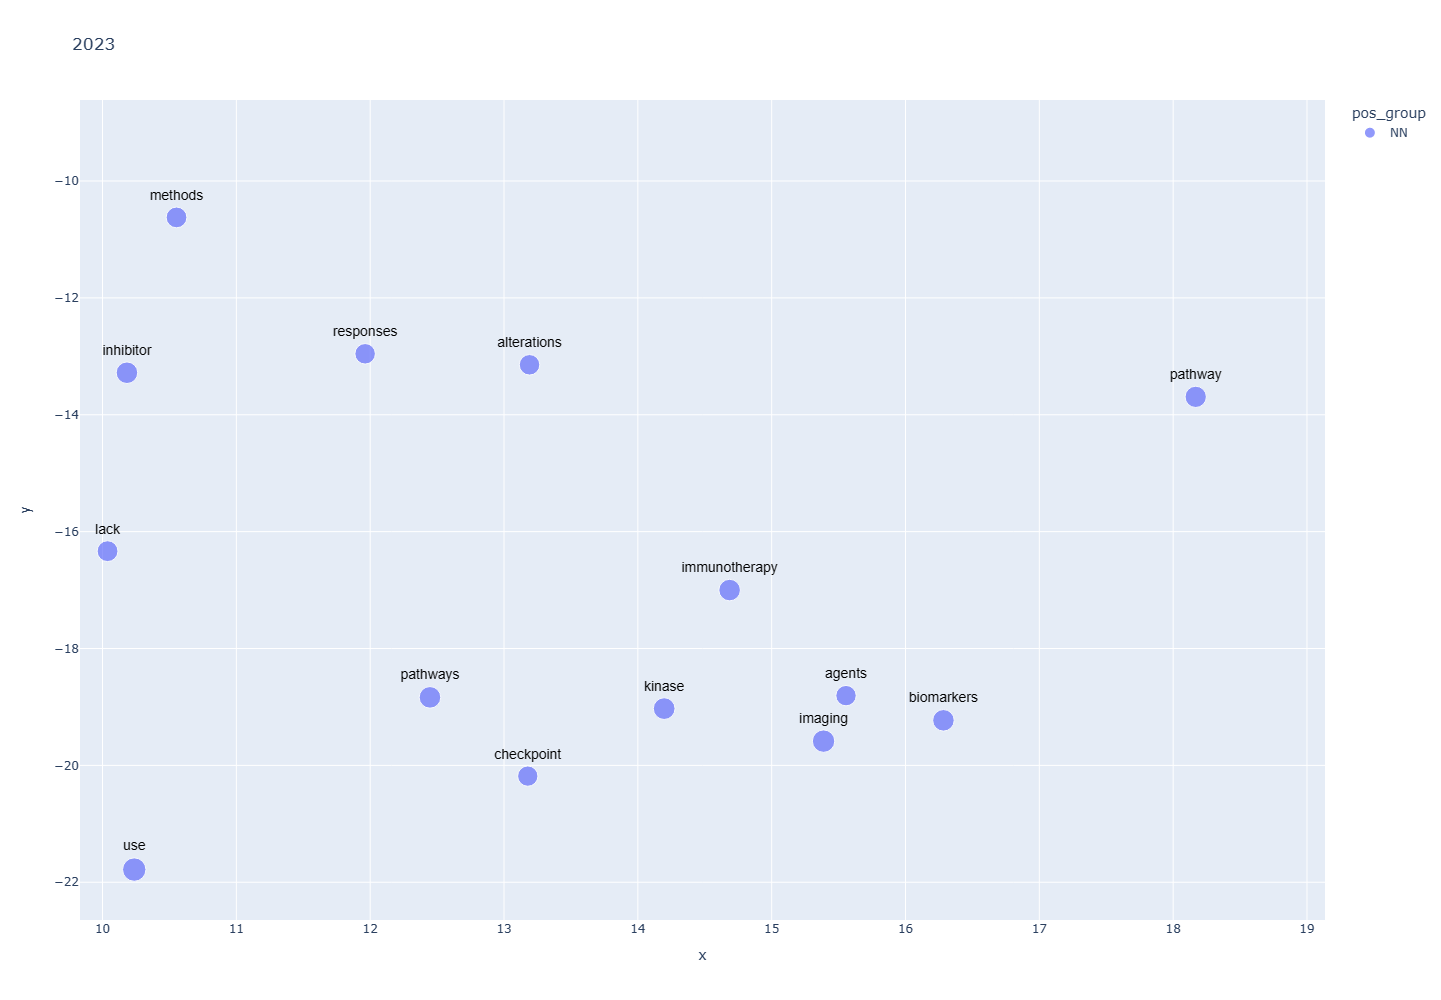

<center><b>Figure 5:</b> <i>Zoomed in plot of word embeddings in 2023 and 1995.</i>(a) Word embedding of abstracts in the year 1995, chemotherapy and radiotherapy are clustered together. (b) Word embedding of abstracts in the year 2023, immunotherapy is quite far from chemotherapy and radiotherapy in the year 2023.</center>

I was also curious how the term gene has changed through out the years, but upon inspection of all the word embedding models from 1995-2023, the word gene is surrounded by similar terms, indicating that the term gene is pretty well conserved. In the recent years, 2015-2023, I was expected to see gene therapy as a potential cancer treatment as technology has allowed the editing of the genome, but I did not see that in the abstracts. I think this might be because gene therapy is still a relatively novel treatment, it probably does not have the coverage that immunotherapy has.

I tried to generate a hierarchical tree of the top n nouns, but there was quite a bit of nonsensical results.

### Sentiment Analysis

Sentiment analysis was applied to each year. The sentiment for every year was negative indicating that almost all of the years were negative which is not surprising as cancer has a really negative connotation. There is no variation in the values for emotions across the years, as the lines in the line plots are virtually flat. Theres virtually no discrimination between the distribution of the emotions' values in each year, but the highest values for each year is sadness and fear. I am not surprised that sadness and fear are the most common emotions in the abstracts because the lexicon of cancer studies can be pretty negative with words like survival, cancer, and chemotherapy. What I am surprised with is that, the abstracts had other emotions. Usually, abstracts are not supposed to invoke any emotions; it is a concise summarization of a paper's overall findings. This might be because some words that have an emotion associated with it might not invoke the same emotion as it does in the abstract.

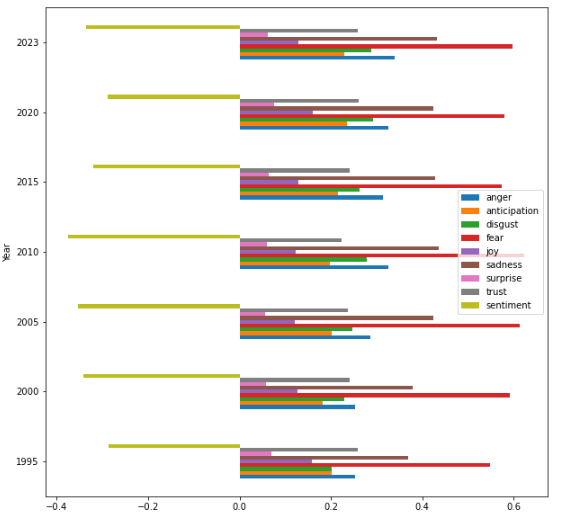

<center><b>Figure 6:</b> <i>Sentiment analysis of abstracts by year in barchart.</i> Horizontal barplot that displays the average emotion and sentiment per year.</center>

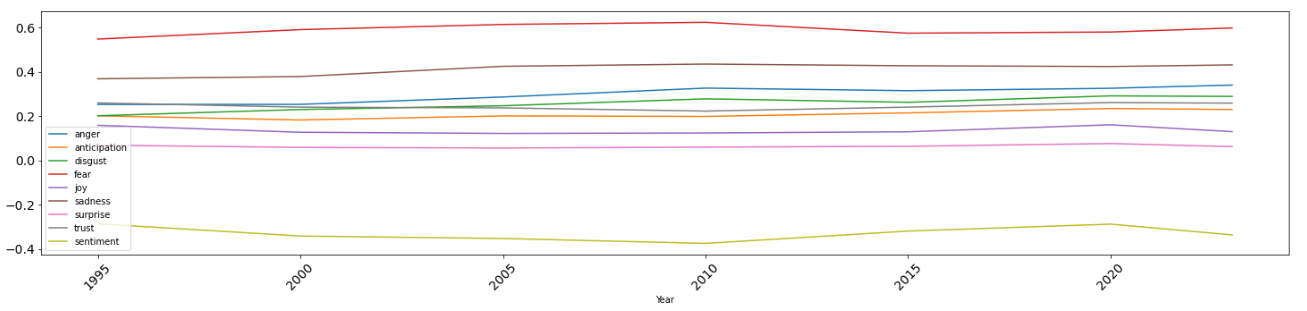

<center><b>Figure 7:</b> <i>Sentiment analysis of abstracts by year in line plot.</i> Line plot that displays the average emotion and sentiment each year.</center>

Using exploratory text analysis techniques, I was able to explore some interesting patterns in scientific abstracts. I was unsuccessful in answering some questions I posed but I think with refinement of the key words, I can possibly answer the questions with more confidence. It was not reasonable to use author as a path to explore trends because there were many authors within a given article and not all authors nor the full names of the authors were given. Also, there was a difficulty in generating the corpus and some of the code for the exploratory techniques. Future work would need include revisiting some of the techniques but with more specific data. 